# Table of Contents
1. Useful Imports

2. Introduction to Discrete Cosine Transform (DCT)
   - Why Discrete Cosine Transform (DCT) is Needed?
   - What is DCT?
   - Energy Compaction Illustration

3. Inverse DCT
   - What it is?
   - Mathematical Representation
   
4. 2D DCT
   - What it is?
   - Mathematical Representation
   
5. Properties of Discrete Cosine Transform (DCT)
   - Orthogonality Property
   - Symmetry Property
   - Parseval's Theorem
   - Decorrelation Property
   
6. Applications of DCT
   - Image Compression
   - Solving Partial Differential Equations (PDEs)
   - Spectral Analysis and Filtering
   - Digital Watermarking and Steganography

7. Conclusion




## Useful Imports

In [45]:
import numpy as np
from scipy.fft import dct
from scipy.fft import fft,idct, dctn
import matplotlib.pyplot as plt
import cv2
import os

## Introduction to Discrete Cosine Transform (DCT)

### Why Discrete Cosine Transform (DCT) is Needed?

  - In signal processing and data compression, transforming data from one domain to another can simplify analysis and compression processes.
  - **Energy Compaction Property**: Energy compaction refers to the ability of a transformation to concentrate most of the signal's energy into a smaller number of coefficients.
  - DFT, while widely used for spectral analysis, exhibits a low energy compaction property, meaning most of the signal's energy is spread across all frequency bins, requiring a large number of coefficients to accurately represent the signal.
  - This low energy compaction property of DFT necessitates a transformation that concentrates signal energy into fewer coefficients, leading to the development of DCT.


### What is DCT?

- **Definition**: DCT is a technique used to convert spatial data into frequency data by decomposing it into a sum of cosine functions of different frequencies.

- **Mathematical Representation**:
  - The DCT of a sequence $ x(n) $ of length $ N $ is defined as:
  
    $$ X(k) =  \alpha(k) \cdot \sum_{n=0}^{N-1} x(n) \cdot \cos \left( \frac{\pi}{N} \left( n + \frac{1}{2} \right) k \right) \quad     k=0,1 .... N-1 $$
    
$$\alpha(k) = \begin{cases} \frac{1}{\sqrt{N}} & \text{for } k = 0 \\ \frac{\sqrt{2}}{\sqrt{N}} & \text{for } k = 1, 2, \ldots, N-1 \end{cases}$$




### Energy Compaction Illustration

To illustrate the energy compaction property, let's compare the DFT and DCT coefficients of a simple signal.




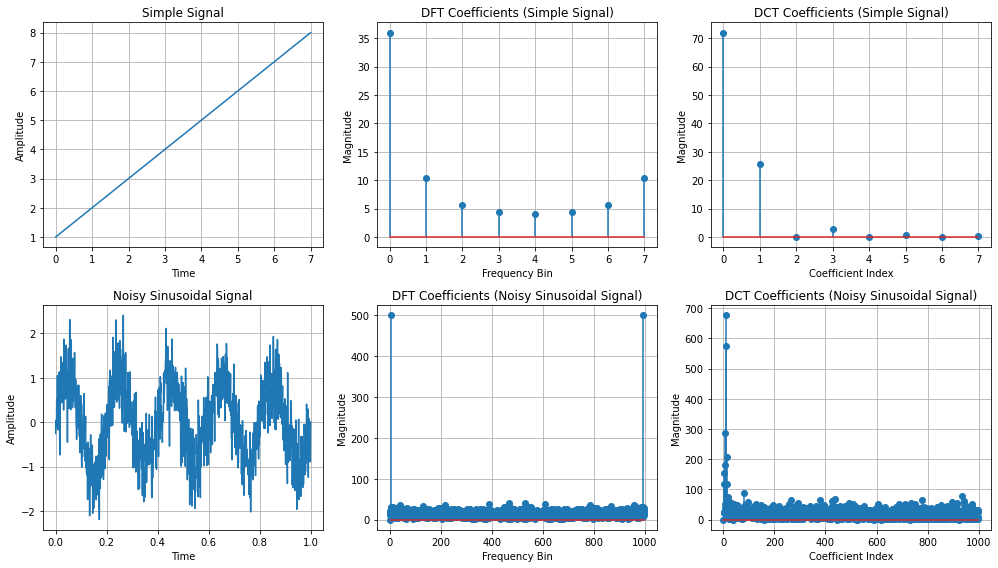

In [46]:
# Create simple signal
signal_simple = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# Create sinusoidal signal with noise
t = np.linspace(0, 1, 1000)
signal_sinusoid = np.sin(2 * np.pi * 5 * t)  # 5 Hz sinusoidal signal
noise = np.random.normal(0, 0.5, len(t))  # Add Gaussian noise with mean 0 and standard deviation 0.5
signal_sinusoid_noisy = signal_sinusoid + noise

# Compute DFT coefficients for simple signal
dft_coefficients_simple = np.abs(fft(signal_simple))

# Compute DCT coefficients for simple signal
dct_coefficients_simple = np.abs(dct(signal_simple, type=2))

# Compute DFT coefficients for sinusoidal signal
dft_coefficients_sinusoid = np.abs(fft(signal_sinusoid_noisy))

# Compute DCT coefficients for sinusoidal signal
dct_coefficients_sinusoid = np.abs(dct(signal_sinusoid_noisy, type=2))

# Plot the signals and their corresponding DFT and DCT coefficients
plt.figure(figsize=(14, 8))

# Plot simple signal and its DFT/DCT
plt.subplot(2, 3, 1)
plt.plot(signal_simple)
plt.title('Simple Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.stem(dft_coefficients_simple, use_line_collection=True)
plt.title('DFT Coefficients (Simple Signal)')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.stem(dct_coefficients_simple, use_line_collection=True)
plt.title('DCT Coefficients (Simple Signal)')
plt.xlabel('Coefficient Index')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot noisy sinusoidal signal and its DFT/DCT
plt.subplot(2, 3, 4)
plt.plot(t, signal_sinusoid_noisy)
plt.title('Noisy Sinusoidal Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.stem(dft_coefficients_sinusoid, use_line_collection=True)
plt.title('DFT Coefficients (Noisy Sinusoidal Signal)')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(2, 3, 6)
plt.stem(dct_coefficients_sinusoid, use_line_collection=True)
plt.title('DCT Coefficients (Noisy Sinusoidal Signal)')
plt.xlabel('Coefficient Index')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()



The plots above illustrate the energy compaction property of the Discrete Cosine Transform (DCT) compared to the Discrete Fourier Transform (DFT). Let's analyze the results:

#### Simple Signal:

- For the simple signal (top row), both DFT and DCT coefficients are shown.
- In the case of the DFT coefficients, energy is distributed across all frequency bins, with no significant concentration of energy in any particular bin.
- On the other hand, the DCT coefficients exhibit higher energy concentration in fewer coefficients, indicating better energy compaction. This means that a smaller number of DCT coefficients are sufficient to represent the signal effectively.

#### Noisy Sinusoidal Signal:

- For the noisy sinusoidal signal (bottom row), the same analysis is applied.
- Again, the DFT coefficients show energy spread across all frequency bins, similar to the simple signal case.
- However, in the DCT coefficients plot, even with the presence of noise, energy is still concentrated in fewer coefficients compared to the DFT. This demonstrates the robustness of DCT in preserving signal energy in the presence of noise.


## Inverse DCT

#### What is it?
The IDCT reconstructs the original signal from its DCT coefficients. It's like putting puzzle pieces back together. The IDCT takes frequency components from the DCT and rebuilds the original signal.

#### Mathematical Representation:
The IDCT formula adds up cosine functions weighted by DCT coefficients to reconstruct the signal.



 $$ x(n) = \sum_{k=0}^{N-1} \alpha(k) \cdot X(k) \cdot \cos \left( \frac{\pi}{N} \left( n + \frac{1}{2} \right) k \right) \quad     n=0,1 .... N-1 $$
 $$\alpha(k) = \begin{cases} \frac{1}{\sqrt{N}} & \text{for } k = 0 \\ \frac{\sqrt{2}}{\sqrt{N}} & \text{for } k = 1, 2, \ldots, N-1 \end{cases}$$
    



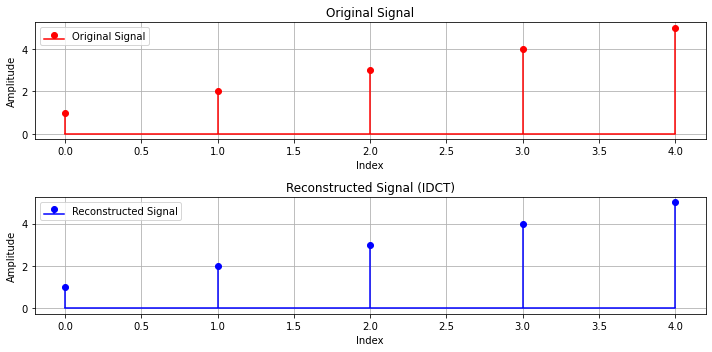

In [47]:
# Define a simple signal (replace with your own signal)
signal = np.array([1, 2, 3, 4, 5])

# Compute the Discrete Cosine Transform (DCT)
dct_coefficients = dct(signal, norm='ortho')

# Reconstruct the original signal using the Inverse DCT (IDCT)
reconstructed_signal = idct(dct_coefficients, norm='ortho')

# Plot the original and reconstructed signals
plt.figure(figsize=(10, 5))

# Plot the original signal
plt.subplot(2, 1, 1)
plt.stem(range(len(signal)), signal, markerfmt='ro', linefmt='r-', basefmt='r-', label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot the reconstructed signal
plt.subplot(2, 1, 2)
plt.stem(range(len(reconstructed_signal)), reconstructed_signal, markerfmt='bo', linefmt='b-', basefmt='b-', label='Reconstructed Signal')
plt.title('Reconstructed Signal (IDCT)')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


The original signal is transformed into its frequency domain representation using DCT, and then reconstructed back to the time domain using IDCT, illustrating the preservation of the original signal's information through the transform and inverse process.

## 2D DCTs

#### What it is?
The 2-D Discrete Cosine Transform (DCT) extends the concept of 1-D DCT to two dimensions and is widely used in image and video compression. It transforms a two-dimensional matrix of pixel values into a set of frequency coefficients.

#### Mathematical Equation:
The 2-D DCT of an $ N \times N $ input matrix $ F $ is defined as:

$$ D(u, v) =  \alpha(u) \alpha(v) \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} f(x, y) \cos \left[ \frac{(2x + 1) u \pi}{2N} \right] \cos \left[ \frac{(2y + 1) v \pi}{2N} \right] $$

Where:

- $ D(u, v) $ is the 2-D DCT coefficient at position $ (u, v) $.
- $ f(x, y) $ represents the pixel value at position $ (x, y) $ in the input matrix $F$.
- $ \alpha(u) $ and $ \alpha(v) $ are normalization factors defined as:
  $$ \alpha(u) = \begin{cases} \frac{1}{\sqrt{N}}, & \text{if } u = 0 \\ \frac{\sqrt{2}}{\sqrt{N}}, & \text{otherwise} \end{cases} $$
  $$ \alpha(v) = \begin{cases} \frac{1}{\sqrt{N}}, & \text{if } v = 0 \\ \frac{\sqrt{2}}{\sqrt{N}}, & \text{otherwise} \end{cases} $$

## Properties of Discrete Cosine Transform (DCT)

### 1. Orthogonality Property

#### Theory:
The orthogonality property of DCT states that the basis functions used in the transformation are orthogonal to each other. In simpler terms, this means that the inner product of any two different DCT basis functions is zero.

$$  \sum_{n=0}^{N-1} \cos\left(\frac{\pi}{N}u\left(n + \frac{1}{2}\right)\right) \cos\left(\frac{\pi}{N}v\left(n + \frac{1}{2}\right)\right) = 0 \quad \text{if } u \neq v
 $$



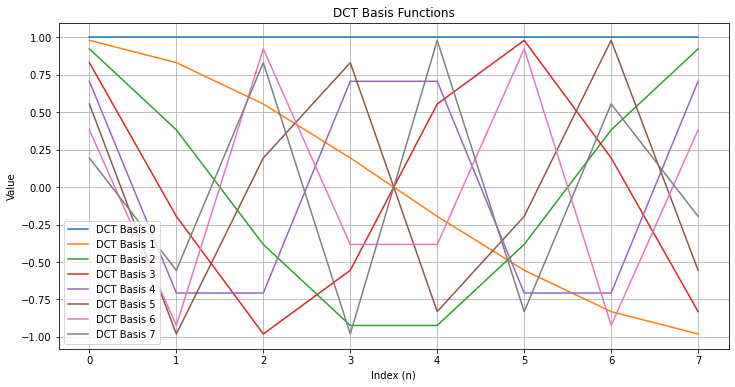

In [48]:
# Function to compute DCT basis function
def dct_basis_function(N, u, n):
    return np.cos((np.pi / N) * u * (n + 0.5))

# Size of the DCT basis functions
N = 8

# Compute DCT basis functions
basis_functions = np.array([[dct_basis_function(N, u, n) for n in range(N)] for u in range(N)])

# Compute inner products of DCT basis functions
inner_products = np.zeros((N, N))
for u in range(N):
    for v in range(N):
        if u != v:
            inner_products[u, v] = np.inner(basis_functions[u], basis_functions[v])

# Plot DCT basis functions
plt.figure(figsize=(12, 6))
for u in range(N):
    plt.plot(range(N), basis_functions[u], label=f'DCT Basis {u}')

plt.title('DCT Basis Functions')
plt.xlabel('Index (n)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()





This plot visually depicts the DCT basis functions, with each curve representing a single basis function. The x-axis denotes the sample index n, while the y-axis illustrates the value of the basis function. These oscillatory functions vary in frequency across the index range, with higher-frequency basis functions exhibiting more rapid oscillations.

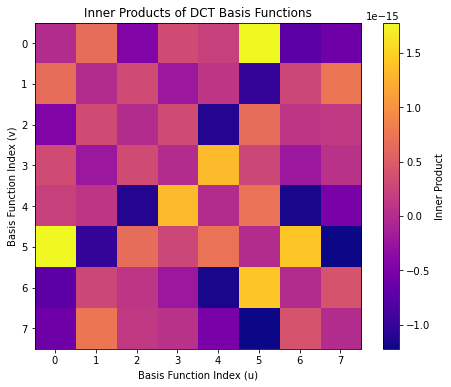

In [49]:
# Plot inner products
plt.figure(figsize=(8, 6))
plt.imshow(inner_products, cmap='plasma', interpolation='nearest')
plt.colorbar(label='Inner Product')
plt.title('Inner Products of DCT Basis Functions')
plt.xlabel('Basis Function Index (u)')
plt.ylabel('Basis Function Index (v)')
plt.show()

This heatmap visualizes the inner products of DCT basis functions. Excluding the diagonal (where u=v) ensures that the inner product of a basis function with itself is not considered. The predominance of cooler colors, close to zero, for off-diagonal entries confirms the orthogonality property of DCT basis functions, with the exception of pairs with the same index, which are explicitly excluded and thus yield a value of zero.

### 2. Symmetry Property

#### Theory:
Consider a DCT basis function $ \phi_k(n) $, where $ n $ represents the index within the interval $[0, N-1]$ and $ k $ denotes the index of the DCT basis function. The symmetry property implies that:
$$ \phi_k(n) = \phi_k(N - n - 1) $$

This symmetry results in real-valued DCT coefficients, making DCT applicable to real-valued signals. It simplifies computation and enables efficient signal representation and processing.

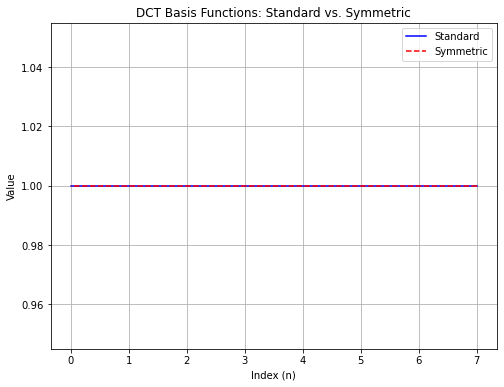

In [50]:
# Function to compute DCT basis function
def dct_basis_function(N, u, n):
    return np.cos((np.pi / N) * u * (n + 0.5))

# Size of the DCT basis functions
N = 8

# Compute DCT basis function using standard formula
n_values = np.arange(N)
basis_function_standard = dct_basis_function(N, 0, n_values)

# Compute DCT basis function using symmetry property
basis_function_symmetric = dct_basis_function(N, 0, N - n_values - 1)

# Plot DCT basis functions
plt.figure(figsize=(8, 6))

plt.plot(n_values, basis_function_standard, label='Standard', color='blue')
plt.plot(N - n_values - 1, basis_function_symmetric, label='Symmetric', linestyle='--', color='red')

plt.title('DCT Basis Functions: Standard vs. Symmetric')
plt.xlabel('Index (n)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


By plotting the basis functions separately and observing their mirror-like behavior, we visually confirm the symmetry property of the Discrete Cosine Transform (DCT).

### 3. Parseval's Theorem

#### Theory:
Parseval's theorem for the Discrete Cosine Transform (DCT) states that the total energy of a signal in the spatial domain (time domain) is equal to the total energy of its corresponding DCT coefficients in the frequency domain. Mathematically, Parseval's theorem for DCT can be expressed as:

$$ \sum_{n=0}^{N-1} |x(n)|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |X(k)|^2 $$

Where:
- $ x(n) $ represents the time-domain (spatial-domain) signal.
- $ X(k) $ represents the DCT coefficients of the signal.
- $ N $ represents the length of the signal.

In essence, Parseval's theorem ensures that the total energy of a signal is conserved when transforming between the time (spatial) and frequency domains using the Discrete Cosine Transform (DCT).



In [51]:
# Original signal
signal = np.array([1, 2, 3, 4, 5])

# Compute DCT of the original signal
dct_coefficients = dct(signal,norm='ortho')

# Compute energy in the time domain
energy_time_domain = np.sum(np.abs(signal) ** 2)

# Compute energy in the frequency domain (using DCT coefficients)
energy_frequency_domain = np.sum(np.abs(dct_coefficients) ** 2) 

# Verify Parseval's theorem
if np.isclose(energy_time_domain, energy_frequency_domain):
    print("Parseval's theorem holds: Energy in the time domain equals energy in the frequency domain.")
else:
    print("Parseval's theorem does not hold: Energy in the time domain does not equal energy in the frequency domain.")


Parseval's theorem holds: Energy in the time domain equals energy in the frequency domain.


### 4. Decorrelation's Property

#### Theory:
The decorrelation property of DCT refers to its ability to transform a signal into a set of uncorrelated frequency components.
#### Use:
In the spatial domain, neighboring pixels in an image often exhibit high correlation, which can lead to redundancy in the data. By transforming the image into the frequency domain using DCT, the correlation between pixels is reduced, resulting in a set of coefficients that are less correlated and more suitable for compression.

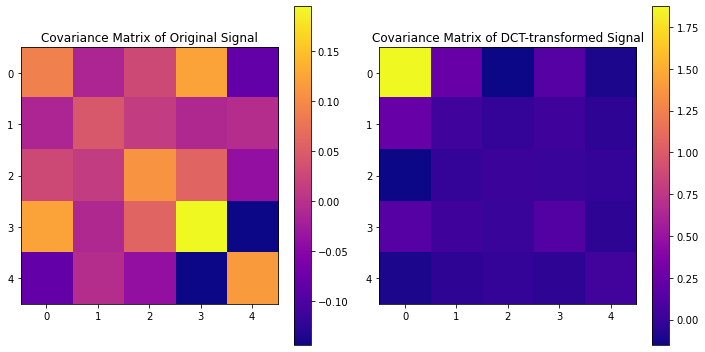

In [60]:
# Generate a synthetic 2D signal (e.g., a matrix with random values)
signal = np.random.rand(5, 5)

# Compute the covariance matrix of the original signal
covariance_original = np.cov(signal, rowvar=False)

# Compute the 2D Discrete Cosine Transform (DCT) of the signal
dct_signal = dctn(signal, norm='ortho')

# Compute the covariance matrix of the DCT-transformed signal
covariance_dct = np.cov(dct_signal, rowvar=False)

# Plot the covariance matrices
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(covariance_original, cmap='plasma')
plt.title('Covariance Matrix of Original Signal')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(covariance_dct, cmap='plasma')
plt.title('Covariance Matrix of DCT-transformed Signal')
plt.colorbar()

plt.tight_layout()
plt.show()



This visualization compares the covariance matrices of the original 2D signal and its DCT-transformed version. The brighter regions in the covariance matrix of the original signal suggest higher correlation between elements, while the DCT-transformed signal exhibits reduced correlation, demonstrating the decorrelation property of the DCT.

## Applications of DCT

### 1. Image compression:
Specifically, the DCT is useful for image compression for the following reasons:

1. **Energy Compaction**: The DCT concentrates most of the image's energy into a small number of low-frequency coefficients, while the high-frequency coefficients contain relatively less energy.

2. **Decorrelation**: The DCT helps to decorrelate the image data, making it more suitable for compression algorithms that work best with less correlated data.

3. **Frequency Separation**: The DCT separates the image into different frequency components, allowing for more precise encoding of the visually important low-frequency components and coarser encoding or discarding of the less important high-frequency components.

4. **Quantization Efficiency**: After the DCT transformation, quantization can be performed more efficiently by dividing the DCT coefficients by a quantization matrix and rounding the result, effectively discarding or reducing the precision of the high-frequency coefficients.

5. **Compatibility with Human Visual System**: The DCT coefficients align well with the way the human visual system perceives images, making it easier to prioritize the encoding of the more visually important low-frequency components.

By applying the DCT to image blocks, transforming them from the spatial domain to the frequency domain, and then quantizing and encoding the resulting DCT coefficients, image compression algorithms can significantly reduce the amount of data required to represent the image while preserving its overall visual quality.

This energy compaction and frequency separation capability of the DCT, combined with its compatibility with the human visual system, make it a widely adopted technique in popular image compression standards like JPEG.

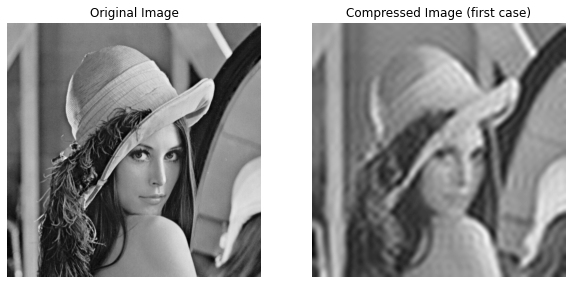

In [53]:
# Load an image
image = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

# Perform Discrete Cosine Transform (DCT)
dct = cv2.dct(np.float32(image))

# Define the percentage of coefficients to retain
compression_ratio = 0.1

# Determine the number of coefficients to retain
num_coefficients_to_retain = int(compression_ratio * dct.shape[0])

# Retain only the top-left coefficients
dct_compressed = np.zeros_like(dct)
dct_compressed[:num_coefficients_to_retain, :num_coefficients_to_retain] = dct[:num_coefficients_to_retain, :num_coefficients_to_retain]

# Perform Inverse Discrete Cosine Transform (IDCT)
compressed_image = cv2.idct(dct_compressed)

# Display the original and compressed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image (first case)')
plt.axis('off')

plt.show()


In this, we retain only the most important coefficients of the Discrete Cosine Transform (DCT) based on the **localization property**. This means we keep only a fraction of the DCT coefficients, typically those in the top-left corner, where most of the signal energy is concentrated.

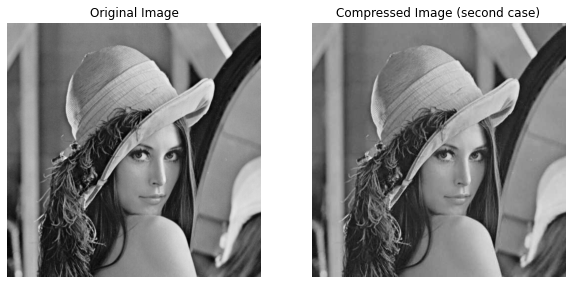

In [54]:
# Load an image
image = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

# Define block size
block_size = 8

# Perform Discrete Cosine Transform (DCT) on 8x8 blocks
dct_blocks = np.zeros_like(image, dtype=np.float32)
for y in range(0, image.shape[0], block_size):
    for x in range(0, image.shape[1], block_size):
        dct_blocks[y:y+block_size, x:x+block_size] = cv2.dct(np.float32(image[y:y+block_size, x:x+block_size]))

# Define quantization matrix (e.g., JPEG standard)
quantization_matrix = np.array([[13, 11, 10, 16, 24, 40, 51, 61],
                                [12, 12, 14, 19, 26, 58, 60, 55],
                                [14, 13, 16, 24, 40, 57, 69, 56],
                                [14, 17, 22, 29, 51, 87, 80, 62],
                                [18, 22, 37, 56, 68, 109, 103, 77],
                                [24, 35, 55, 64, 81, 104, 113, 92],
                                [49, 64, 78, 87, 103, 121, 120, 101],
                                [72, 92, 95, 98, 112, 100, 103, 99]])

# Quantize the DCT coefficients for each block
quantized_dct_blocks = np.zeros_like(dct_blocks)
for y in range(0, image.shape[0], block_size):
    for x in range(0, image.shape[1], block_size):
        quantized_dct_blocks[y:y+block_size, x:x+block_size] = np.round(dct_blocks[y:y+block_size, x:x+block_size] / quantization_matrix)

# Perform Inverse Discrete Cosine Transform (IDCT)
compressed_image2= np.zeros_like(image)
for y in range(0, image.shape[0], block_size):
    for x in range(0, image.shape[1], block_size):
        compressed_image2[y:y+block_size, x:x+block_size] = cv2.idct(quantized_dct_blocks[y:y+block_size, x:x+block_size] * quantization_matrix)

# Display the original and compressed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image2, cmap='gray')
plt.title('Compressed Image (second case)')
plt.axis('off')

plt.show()


In this compression, we quantize the DCT coefficients using a predefined quantization matrix. This process involves dividing each DCT coefficient by a corresponding value in the quantization matrix and rounding to the nearest integer. The values in quantization matrix is choosed such that the low frequency are compressed less and high frequency are compressed more making it nearly **visually lossless**.

In [35]:
# Save the compressed images
cv2.imwrite('compressed_image_1.jpg', compressed_image)
cv2.imwrite('compressed_image_2.jpg', compressed_image2)

True

In [55]:
# Get the file sizes
original_size = os.path.getsize('Lenna.png')
compressed_size_type1 = os.path.getsize('compressed_image_1.jpg')
compressed_size_type2 = os.path.getsize('compressed_image_2.jpg')

# Calculate the compression percentages
compression_percentage_type1 = (1 - compressed_size_type1 / original_size) * 100
compression_percentage_type2 = (1 - compressed_size_type2 / original_size) * 100

# Print the compression percentages
print("Compression Percentage (Type 1):", compression_percentage_type1, "%")
print("Compression Percentage (Type 2):", compression_percentage_type2, "%")

Compression Percentage (Type 1): 91.87326282999635 %
Compression Percentage (Type 2): 90.67853306347622 %



In first case compression, we achieve a higher level of compression by removing a significant portion of DCT coefficients, leading to a loss in image quality. But in second compression, although we retain more coefficients, the quality is better preserved due to the application of quantization, which reduces the precision of the coefficients but retains more information compared to first case. Second case is used in **JPEG compression** , which is widely adopted as an industry standard due to its ability to strike a balance between compression efficiency and image quality preservation.

### 2. Solving Partial Differential Equations:

#### Theory: 
Discrete Cosine Transforms (DCTs) provide an efficient method for solving PDEs numerically by transforming them from the spatial domain to the frequency domain. Here's an overview of the process:

1. **Spatial Discretization**: The spatial domain of the PDE is discretized by dividing it into a grid of discrete points.

2. **DCT Transformation**: The DCT is applied to the discretized PDE, transforming it from the spatial domain to the frequency domain. This yields a system of algebraic equations involving the DCT coefficients.

3. **Solution in Frequency Domain**: The PDE simplifies in the frequency domain, allowing for easier solution of the system of algebraic equations.

4. **Inverse DCT Transformation**: The solution obtained in the frequency domain is transformed back to the spatial domain using the inverse DCT, providing the solution to the original PDE at the discrete grid points.

5. **Boundary Conditions and Error Analysis**: Boundary conditions are applied to the solution, and error analysis is performed to ensure accuracy.

The basic idea is to represent the solution of the PDE as a sum of DCT basis functions, which are cosine functions of different frequencies. By substituting this representation into the PDE and applying boundary conditions, we can obtain a system of equations involving the DCT coefficients. Solving this system of equations numerically gives us the approximate solution to the PDE.

By utilizing DCTs for spatial discretization and transformation, PDEs can be solved efficiently and accurately, making them a valuable tool in various fields such as fluid dynamics, heat transfer, and structural mechanics.
#### Example 


Consider the one-dimensional heat conduction problem described by the following partial differential equation (PDE):

$$
\frac{\partial u}{\partial t} = k \frac{\partial^2 u}{\partial x^2}
$$

where:
- $ u(x, t) $ is the temperature distribution at position $x$ and time $t$ ,
- $ k $ is the thermal diffusivity coefficient.

The rod has a length $ L = 1 $ unit, and we discretize it into $ N = 100 $ equally spaced points. The total simulation time is $ T = 10 $ units, and the time step size is $ \Delta t = 0.01 $ units.

##### Initial Conditions:
The initial temperature distribution is given by $ u(x, 0) = 0 $ for $ 0 \leq x \leq L $.

##### Boundary Conditions:
The rod is subject to the following Dirichlet boundary conditions:
- $ u(0, t) = 0 $ (fixed temperature at $ x = 0 $),
- $ u(L, t) = 100 $ (fixed temperature at $ x = L $).

##### Solution Approach:
1. **Discretization**: Discretize the spatial domain into \( N \) equally spaced points.
2. **DCT Transformation**: Apply the Discrete Cosine Transform (DCT) to transform the PDE from the spatial domain to the frequency domain.
3. **Time-Stepping Loop**: Use a time-stepping loop to solve the PDE numerically. Apply Dirichlet boundary conditions explicitly during each time step.
4. **Inverse DCT Transformation**: Apply the inverse DCT transformation to obtain the solution in the spatial domain.
5. **Visualization**: Plot the temperature distribution at the final time step.

The goal is to use the DCT method to solve the 1D heat equation with Dirichlet boundary conditions and visualize the temperature distribution along the rod at the final time step.



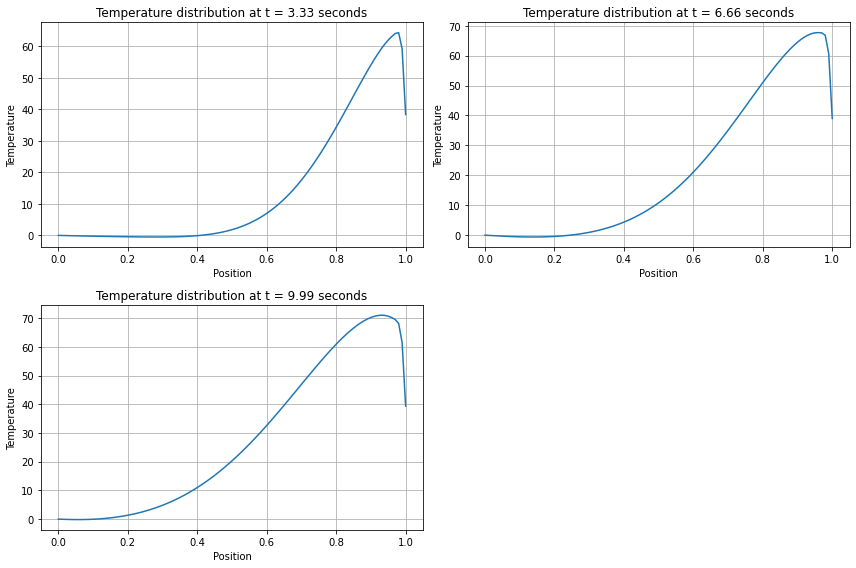

In [61]:
import numpy as np
from scipy.fft import dct

# Parameters
L = 1.0  # Length of the rod
k = 0.01  # Thermal diffusivity coefficient
N = 100  # Number of grid points
T = 10 # Total simulation time
dt = 0.01  # Time step size

# Discretization
x = np.linspace(0, L, N)
dx = x[1] - x[0]

# Initial condition
u_initial = np.zeros(N)

# Boundary conditions
u_left_boundary = np.zeros(N)
u_right_boundary = 100 * np.ones(N)

# DCT Transformation matrix
DCT_matrix = dct(np.eye(N), norm='ortho')

# Time-stepping loop
time_steps = int(T / dt)
u_solution = np.zeros((time_steps, N))
u_solution[0] = u_initial

# Calculate time indices for plotting
plot_times = [int(time_steps / 3), int(2 * time_steps / 3), time_steps - 1]

for t in range(1, time_steps):
    # Apply Dirichlet boundary conditions
    u_solution[t] = u_solution[t-1]
    u_solution[t, 0] = u_left_boundary[0]
    u_solution[t, -1] = u_right_boundary[-1]
    
    # Apply DCT transformation
    u_dct = np.dot(DCT_matrix, u_solution[t])
    
    # Solve in frequency domain
    u_dct_new = u_dct * np.exp(-k * (np.pi**2) * (np.arange(N)**2) * dt)
    
    # Apply inverse DCT transformation
    u_solution[t] = np.dot(DCT_matrix.T, u_dct_new)

# Plot temperature distributions at different time endings
plt.figure(figsize=(12, 8))

for i, plot_time in enumerate(plot_times):
    plt.subplot(2, 2, i + 1)
    plt.plot(x, u_solution[plot_time])
    plt.title(f'Temperature distribution at t = {plot_time * dt:.2f} seconds')
    plt.xlabel('Position')
    plt.ylabel('Temperature')
    plt.grid(True)

plt.tight_layout()
plt.show()


### 3. Spectral Analysis and Filtering:
#### Theory:
The Discrete Cosine Transform (DCT) converts a signal from the spatial domain to the frequency domain by representing it as a sum of cosine functions with different frequencies. In spectral analysis and filtering, the DCT is used to examine the frequency content of a signal and modify its characteristics by selectively altering or removing certain frequency components.
By decomposing the signal into frequency components, the DCT enables the isolation and analysis of specific frequency bands, aiding in tasks like noise removal or feature enhancement.

#### Steps:
1. **Transform the Signal**:
   Apply the DCT to the signal to decompose it into its frequency components.

2. **Analyze the Spectrum**:
   Examine the DCT coefficients to identify dominant frequency components and understand their contributions to the signal.

3. **Filtering**:
   Modify the DCT coefficients to filter out unwanted frequencies or enhance desired ones using techniques like low-pass or high-pass filtering.

4. **Inverse Transformation**:
   Apply the inverse DCT to reconstruct the filtered signal in the spatial domain.

5. **Evaluate and Adjust**:
   Assess the effectiveness of the filtering process and adjust parameters as needed to achieve the desired outcome.


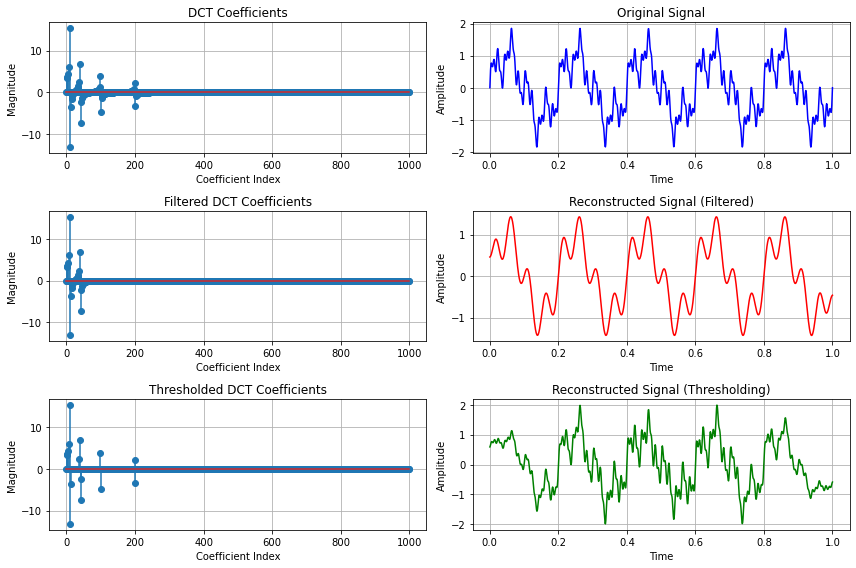

In [62]:
import numpy as np
from scipy.fft import dct
# Generate a synthetic signal (sum of multiple sinusoids)
t = np.linspace(0, 1, 1000)
signal = (
    np.sin(2 * np.pi * 5 * t) +                # 5 Hz sinusoid
    0.5 * np.sin(2 * np.pi * 20 * t) +         # 20 Hz sinusoid
    0.3 * np.sin(2 * np.pi * 50 * t) +         # 50 Hz sinusoid
    0.2 * np.sin(2 * np.pi * 100 * t)          # 100 Hz sinusoid
)

# Compute DCT of the signal
dct_coeffs = dct(signal, norm='ortho')
plt.figure(figsize=(12, 8))

# Visualize the DCT coefficients
plt.subplot(3, 2, 1)
plt.stem(dct_coeffs, use_line_collection=True)
plt.title('DCT Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Magnitude')
plt.grid(True)
# Visualize the original signal
plt.subplot(3, 2, 2)
plt.plot(t, signal, color='blue')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)


# Filter out specific frequency components (e.g., retain first 100 coefficients)
filtered_coeffs = np.zeros_like(dct_coeffs)
filtered_coeffs[:70] = dct_coeffs[:70]

# Reconstruct the filtered signal using inverse DCT
filtered_signal = idct(filtered_coeffs, norm='ortho')

# Visualize the filtered DCT coefficients
plt.subplot(3, 2, 3)
plt.stem(filtered_coeffs, use_line_collection=True)
plt.title('Filtered DCT Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Magnitude')
plt.grid(True)

# Visualize the reconstructed signal
plt.subplot(3, 2, 4)
plt.plot(t, filtered_signal, color='red')
plt.title('Reconstructed Signal (Filtered)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# Thresholding filter
threshold = 2 # Adjust threshold value as needed
thresholded_coeffs = np.where(np.abs(dct_coeffs) > threshold, dct_coeffs, 0)

# Reconstruct the signal using inverse DCT (Thresholding)
reconstructed_thresholded_signal = idct(thresholded_coeffs, norm='ortho')

# Visualize the filtered DCT coefficients (Thresholding)

plt.subplot(3, 2, 5)
plt.stem(thresholded_coeffs, use_line_collection=True)
plt.title('Thresholded DCT Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Magnitude')
plt.grid(True)

# Reconstructed signal from thresholded coefficients
plt.subplot(3, 2, 6)
plt.plot(t, reconstructed_thresholded_signal, color='green')
plt.title('Reconstructed Signal (Thresholding)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


The DCT coefficients are computed and visualized, followed by filtering techniques such as retaining specific frequency components and thresholding to remove low-energy coefficients. The filtered signals are then reconstructed using inverse DCT, demonstrating the manipulation of frequency content in the signal.








### 4. Digital Watermarking and Steganography:
The Discrete Cosine Transform (DCT) is widely used in digital watermarking and steganography techniques for embedding and retrieving data or watermarks in multimedia content like images and videos.

**Digital Watermarking**:

1. **Embedding Watermark**:
  - Divide the image/video into non-overlapping blocks (e.g., 8x8 pixels)
  - Apply DCT to each block to transform from spatial to frequency domain
  - Modify mid-frequency or high-frequency DCT coefficients to embed the watermark
  - Apply inverse DCT (IDCT) to obtain the watermarked content

2. **Retrieving Watermark**:
  - Divide the watermarked content into blocks
  - Apply DCT to each block
  - Extract the watermark from the modified DCT coefficients
  - Verify the extracted watermark for authentication or copyright purposes

**Steganography**:

1. **Embedding Secret Data**:
  - Divide the cover image into non-overlapping blocks
  - Apply DCT to each block
  - Embed the secret data by modifying the least significant bits (LSBs) of mid-frequency or high-frequency DCT coefficients
  - Apply IDCT to obtain the stego-image (image with hidden data)

2. **Retrieving Secret Data**:
  - Divide the stego-image into blocks
  - Apply DCT to each block
  - Extract the hidden data from the modified DCT coefficients
  - Reconstruct the original secret data from the extracted information

In both watermarking and steganography, the DCT's energy compaction property allows the data or watermark to be embedded in the less perceptible high-frequency components, minimizing visual distortion. It requires use of complex algorithms so will not be covering the illustrations for this (interested users can refer to internet for the same).

## Conclusion
In wrapping up our journey through the world of Discrete Cosine Transform (DCT), it's like a magic tool for squeezing and organizing information in digital signals, making them easier to handle and store. Imagine it as a super-efficient filing system for digital data!

We've seen how the DCT solves a big problem in signal processing: other methods like the Discrete Fourier Transform (DFT) spread out the data too much, making it hard to store and work with efficiently. But the DCT neatly packs the important parts together, saving space and making it easier to manage.

From understanding its basic math to seeing how it's used in real-world applications like compressing images, analyzing signals, and even hiding secret messages, we've explored the many ways the DCT helps make our digital world run smoothly.

As we conclude our journey, let's marvel at the DCT's power to simplify and streamline digital tasks, opening up new possibilities and making our lives a little bit easier in the process.